# **Title: TeslAI - Leveraging Artificial Intelligence for Predictive Analysis of Tesla Stock Time Series Data**

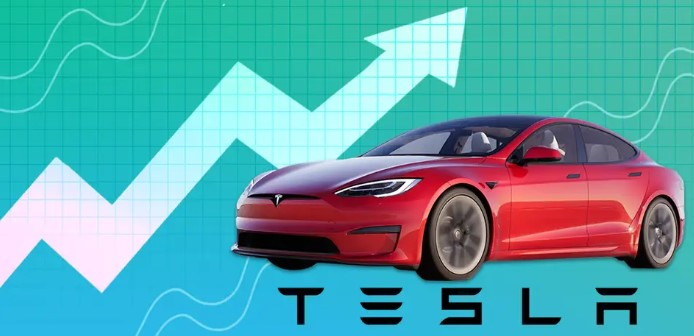



**Overview/Introduction**:
In today's high-tech world, using artificial intelligence (AI) to understand and predict the stock market can give us a real advantage. This project focuses on Tesla, Inc., a major company that makes electric vehicles and renewable energy products. We will use AI to analyze Tesla's historical stock data, helping to make smarter investment decisions.

**Problem Statement**:
The stock market can be unpredictable, and traditional methods of predicting stock trends can be slow, prone to mistakes, and can't keep up with the complex nature of financial markets. There is a clear need for a system that can quickly and accurately analyze a lot of stock data and predict future trends.

**Objectives**:
The main aim of this project is to create an AI system that can predict Tesla's stock trends by analyzing historical data. Our specific goals are:

1. To build an AI system that can use a lot of past stock data to predict future prices.
2. To find important patterns in the data that might affect Tesla's stock price.
3. To give useful advice to investors to help them make better decisions and avoid potential risks.
4. To improve the AI system's accuracy by adjusting it and testing it against real-life results.

**Dataset Description**:
The data we'll be using for this project includes daily price data for Tesla's stock. It covers many years and includes the opening price, closing price, highest price, lowest price, and the number of shares traded, all in US dollars. This detailed data will help us understand how Tesla's stock has performed over time and build an AI system that can predict future trends and give valuable advice to investors.

**URL Dataset:** https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021

**Technologies Used:**

The code uses the Python programming language with several libraries for data manipulation, visualization, and machine learning:

1. **Pandas:** For data manipulation and analysis. It's used to read the CSV file and handle the DataFrame.
2. **Matplotlib:** A library used for data visualization. It's used to plot Tesla's stock price over time.
3. **CSV:** To read data from CSV files.
4. **Datetime:** To parse date strings into datetime objects.
5. **Numpy:** A library used for working with arrays. It is used to convert list data into NumPy arrays for easier manipulation.
6. **TensorFlow:** A machine learning library, used here to create the dataset windows and the LSTM model.
7. **Keras Tuner:** A library for hyperparameter tuning. It's used to find the best hyperparameters for the LSTM model.

**Methodology:**

The process started with importing the Tesla stock data using pandas and performing data manipulations to extract only the daily closing prices. An alternate way of importing data using Python's built-in CSV and datetime modules was also demonstrated. The data was then visualized using matplotlib to show Tesla's stock price trend over time.

Next, the time-series data was split into train and test sets using an 80/20 split. The data was then converted into a format suitable for time series forecasting by creating 'windows' of data. These windows were generated using a custom TensorFlow function which produces sequences of a specified length from the original series.

A machine learning model using LSTM (Long Short-Term Memory) layers was then created. Hyperparameter tuning was performed using Keras Tuner to find the best combination of hyperparameters for the LSTM model.


**Implementation:**
The code started by importing the necessary libraries and loading the data. After some basic data manipulation and visualization, it split the data into training and testing sets. Then, it created a function to generate windows of data suitable for time series forecasting.

A model with multiple layers, including LSTM layers, was then built. The model's hyperparameters were tuned using Keras Tuner to find the best model. The model was trained on the windowed training data and validated on the windowed testing data. The model with the best performance was saved and later loaded for further analysis.


**Results:**
In the analysis, the final trained model demonstrated a Mean Squared Error (MSE) of 1626.7290 and a Mean Absolute Error (MAE) of 28.3181 in the validation set.


**Discussion:**
The performance of the model can be evaluated using various metrics, but the most common and most easily interpretable ones are the Mean Squared Error (MSE) and Mean Absolute Error (MAE). The MSE, calculated at 1626.7290, provides a measure of the average of the squares of the errors - that is, the average squared difference between the estimated values and the actual value.

On the other hand, the MAE, calculated at 28.3181, measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the validation dataset of the absolute differences between prediction and actual observation where all individual differences have equal weight.


**Conclusion:**
The resulting model achieved an MSE of 1626.7290 and an MAE of 28.3181 on the validation set. These metrics serve as a benchmark for future improvements, either through hyperparameter tuning, architectural modifications, or other preprocessing techniques. However, the model's quality will also need to be evaluated based on its applicability to the problem at hand, as well as its comparison to other models trained on the same data.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import itertools
import random
import os
import csv

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

The following code shows a function called seed_everything() that sets the seed values for TensorFlow, NumPy, and Python's random library. This is done to ensure reproducibility of results in future use cases.

In [ ]:
# Seed Everything to reproduce results for future use cases
def seed_everything(seed=42):
    # Seed value for TensorFlow
    tf.random.set_seed(seed)

    # Seed value for NumPy
    np.random.seed(seed)

    # Seed value for Python's random library
    random.seed(seed)

seed_everything()

The next code imports the pandas library and reads a CSV file containing Tesla stock data. It parses the dates column and sets it as the index of the DataFrame.

In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


Now we will perform data manipulation to extract only the closing price of Tesla stock for each day. The code creates a new DataFrame called TSLA that contains only the closing price column.

In [ ]:
# Only want closing price for each day
TSLA = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
TSLA.head()

,Price
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


The following code imports the matplotlib library and plots the stock price of Tesla using the TSLA DataFrame. The plot includes labels for the y-axis and title.

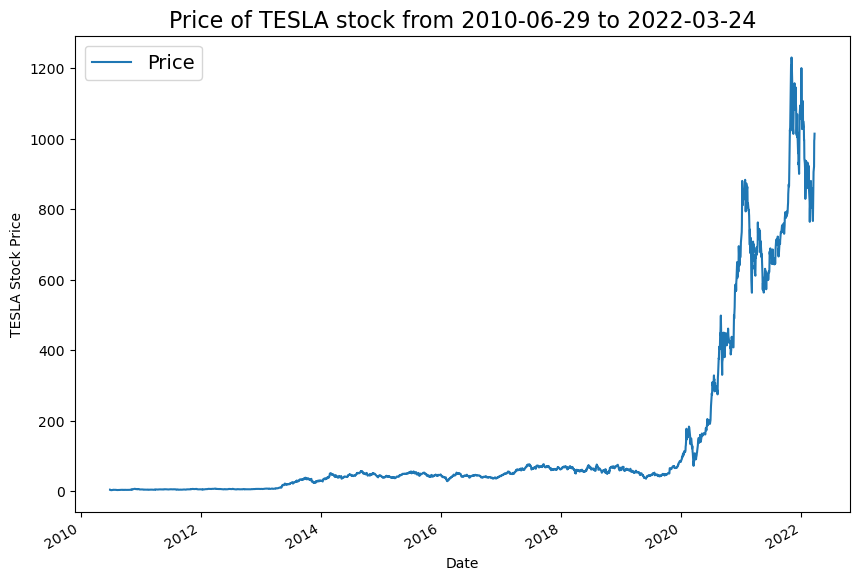

In [ ]:
import matplotlib.pyplot as plt
TSLA.plot(figsize=(10, 7))
plt.ylabel("TESLA Stock Price")
plt.title("Price of TESLA stock from 2010-06-29 to 2022-03-24", fontsize=16)
plt.legend(fontsize=14);

**Alternatve Data Import: Python Modules**

The code defines a variable DATA_DIR that stores the path to a CSV file containing Tesla stock data.

In [ ]:
DATA_DIR="/kaggle/input/tesla-stock-data-updated-till-28jun2021/TSLA.csv"

Next, the code imports the csv module and opens the CSV file. It creates a CSV reader object and reads the first row (header) of the CSV file. Then, it prints the column names.

In [ ]:
import csv

# Open the CSV file
with open(DATA_DIR, "r") as f:
    # Create a CSV reader object
    reader = csv.reader(f)

    # Read the first row (header) of the CSV file
    header = next(reader)

    # Print the column names
    print(header)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


From the datetime module, the code imports the datetime class. It initializes two empty lists, timesteps and stock_price. Then, it opens the CSV file again, reads it line by line, and appends the parsed date and closing price to the respective lists.

In [ ]:
from datetime import datetime

timesteps = []
stock_price = []
with open(DATA_DIR, "r") as f:
    csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
    next(csv_reader) # skip first line (this gets rid of the column titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
        stock_price.append(float(line[4])) # get the closing price as float

# View first 10 of each
timesteps[:10], stock_price[:10]


([datetime.datetime(2010, 6, 29, 0, 0),
  datetime.datetime(2010, 6, 30, 0, 0),
  datetime.datetime(2010, 7, 1, 0, 0),
  datetime.datetime(2010, 7, 2, 0, 0),
  datetime.datetime(2010, 7, 6, 0, 0),
  datetime.datetime(2010, 7, 7, 0, 0),
  datetime.datetime(2010, 7, 8, 0, 0),
  datetime.datetime(2010, 7, 9, 0, 0),
  datetime.datetime(2010, 7, 12, 0, 0),
  datetime.datetime(2010, 7, 13, 0, 0)],
 [4.778, 4.766, 4.392, 3.84, 3.222, 3.16, 3.492, 3.48, 3.41, 3.628])

The code plots the stock price of Tesla using the timesteps and stock_price lists. The plot includes labels for the x-axis, y-axis, and title.

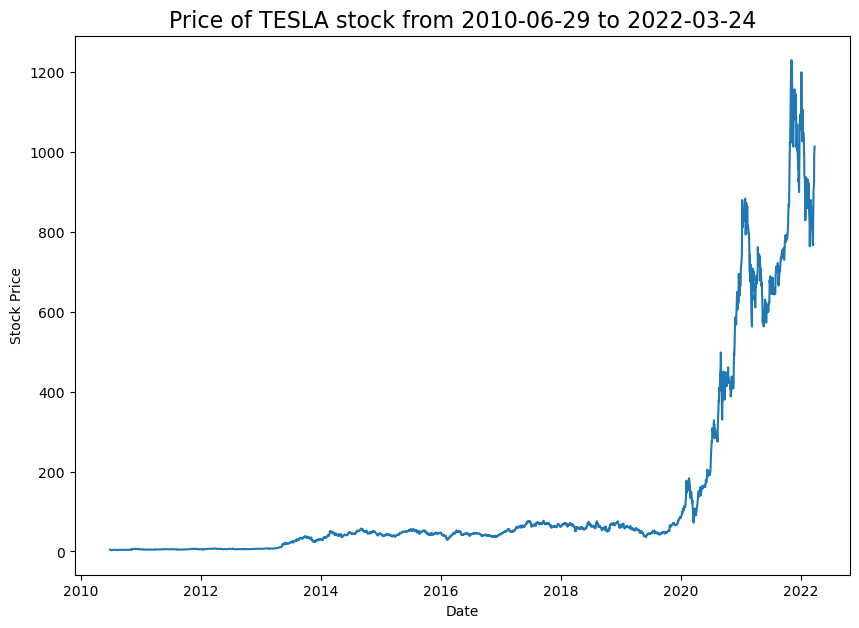

In [ ]:
# Plot from CSV
plt.figure(figsize=(10, 7))
plt.plot(timesteps, stock_price)
plt.title("Price of TESLA stock from 2010-06-29 to 2022-03-24", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Stock Price");

Now we will create train and test splits for the time series data. The code calculates the split size as 80% of the total data length, and then creates separate lists (X_train, y_train, X_test, y_test) for the train and test data.

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(stock_price)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], stock_price[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], stock_price[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2364, 592, 2364, 592)

The code converts the train and test lists to NumPy arrays using the np.array() function. Then, it prints the shape of each array.

In [ ]:
# Convert list to NumPy array
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Now you can use .shape
print(X_train_np.shape, y_train_np.shape, X_test_np.shape, y_test_np.shape)

(2364,) (2364,) (592,) (592,)


The code plots the correctly made train and test splits using scatter plots. The train data is shown in blue, and the test data is shown in red. The plot includes labels for the x-axis, y-axis, and a legend.

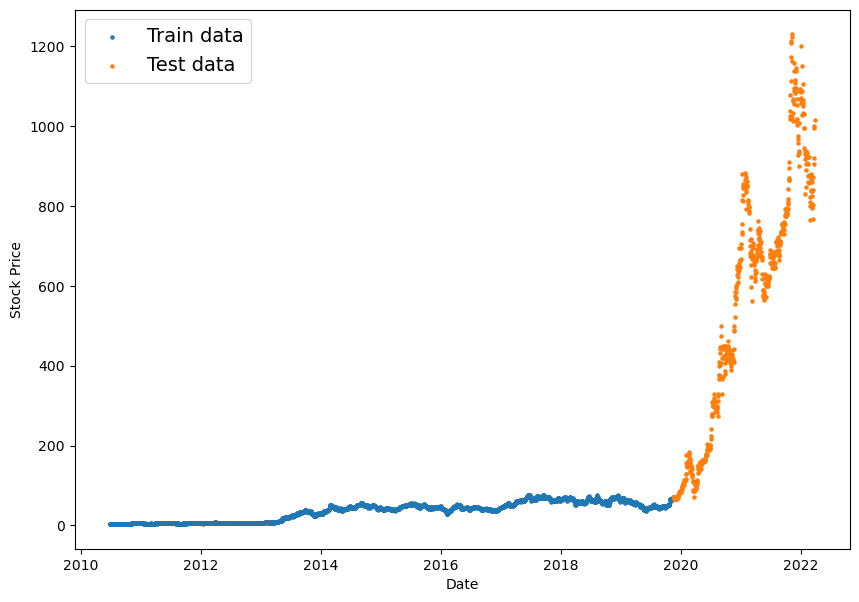

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend(fontsize=14)
plt.show();

**Evaluation Metrics**

The next code defines a function called mean_absolute_scaled_error() that calculates the mean absolute scaled error (MASE) metric. It takes two input arrays, y_true and y_pred, and returns the MASE value.

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

The code defines another function called evaluate_preds() that evaluates the predictions made by a model. It calculates various metrics such as mean absolute error (MAE), mean squared error (MSE), root mean squared error (RMSE), mean absolute percentage error (MAPE), and MASE. The function returns a dictionary containing the computed metric values.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

**Create Window Dataset**

Now we will create a function called windowed_dataset() that generates dataset windows for time series data. It takes a series of values, window size, batch size, shuffle buffer size, and a boolean value indicating whether to shuffle the dataset. It returns a TensorFlow Dataset containing the time windows.

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer, shuffle=True):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method
      shuffle(bool) - whether to shuffle the dataset

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    if shuffle:
        dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset


The code sets parameters for the window size, batch size, and shuffle buffer size. Then, it generates the dataset windows for the train set using the windowed_dataset() function. It also generates the windowed dataset for the validation set without shuffling.

In [ ]:
# Parameters
window_size = 7
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(y_train, window_size, batch_size, shuffle_buffer_size)

# Generate the windowed dataset for the validation set, without shuffling
val_set = windowed_dataset(y_test, window_size, batch_size, shuffle_buffer_size, shuffle=False)


In [ ]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense, Lambda
from tensorflow.keras.optimizers import Adam
!pip install keras-tuner
import keras_tuner as kt

The code sets a variable BATCH_SIZE to 32.

In [ ]:
BATCH_SIZE=32

**Hyperparameter Tuning**

Next, the code defines a function called build_model() that builds a model architecture using hyperparameters. It uses the Keras Tuner library for hyperparameter tuning. The function takes a hyperparameter object hp as input. It defines the architecture of the model, including convolutional and LSTM layers, dropout, and output layer. It compiles the model with a mean squared error loss function and an Adam optimizer. The function returns the built model.

In [ ]:
def build_model(hp):

    # Define all hyperparameters
    n_layers = hp.Choice('n_layers', [1, 2, 3])
    dropout_rate = hp.Choice('dropout_rate', [0.2, 0.3, 0.4, 0.5])
    n_units = hp.Choice('n_units', [50, 100, 200])
    n_filters = hp.Choice('n_filters', [32, 64, 128])
    kernel_size = hp.Choice('kernel_size', [2, 3, 5])

    # Model architecture
    model = Sequential()

    # Lambda layer to expand dimensions
    model.add(Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[window_size]))

    # Conv1D for feature extraction
    model.add(Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    # Add LSTM layers
    for i in range(n_layers):
        if i == 0:
            # First layer specifies return sequences if more than one LSTM layer
            model.add(Bidirectional(LSTM(n_units, return_sequences=(n_layers != 1), activation='relu')))
        else:
            # Middle layers return sequences, last layer doesn't
            model.add(Bidirectional(LSTM(n_units, return_sequences=(i != n_layers - 1), activation='relu')))

        # Add Dropout after each LSTM layer
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(
        loss='mean_squared_error',
        optimizer = Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        metrics = ['mean_absolute_error']
    )

    # Return model
    return model


The code initializes a RandomSearch object from the Keras Tuner library. It specifies the hypermodel as the build_model() function, sets the objective as validation loss, and sets the maximum number of trials to 20. It then starts the search using the search() method, passing the train and validation datasets, as well as the number of epochs and batch size.

In [ ]:
# Initialize Random Searcher
random_searcher = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_loss',
    max_trials=20,
    seed=42,
    project_name="TSLA_Search"
)

# Start Searching
search = random_searcher.search(
    train_set,
    validation_data=val_set,
    epochs = 30,
    batch_size = BATCH_SIZE
)

Trial 20 Complete [00h 01m 53s]
val_loss: 3502.748046875

Best val_loss So Far: 1549.3548583984375
Total elapsed time: 00h 17m 42s


Now we will collect the best model obtained from the random search. The code calls the get_best_hyperparameters() method to retrieve the best hyperparameters and uses them to build the best model.

In [ ]:
# Collect the best model LSTM Model Architecture obtained by Random Searcher
best_model = build_model(random_searcher.get_best_hyperparameters(num_trials=1)[0])

# Model Architecture
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 7, 1)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 128)            768       
                                                                 
 batch_normalization_1 (Batc  (None, 3, 128)           512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 400)              526400    
 nal)                                                            
                                                      

 It then compiles the model, specifying the loss function, optimizer, and metrics. The code trains the model using the train and validation datasets, and includes callbacks for early stopping and model checkpointing.

In [ ]:
# Compile Model
best_model.compile(
    loss='mean_squared_error',
    optimizer=Adam(best_model.optimizer.learning_rate),
    metrics=['mean_absolute_error']
)

# Model Training
best_model_history = best_model.fit(
    train_set,
    validation_data=val_set,
    epochs = 300,
    batch_size = BATCH_SIZE*2,
    callbacks = [
        EarlyStopping(patience=100, restore_best_weights=True),
        ModelCheckpoint("BestModel.h5", save_best_only=True)
    ]
)

Epoch 1/300
74/74 [==============================] - 4s 15ms/step - loss: 61.0509 - mean_absolute_error: 5.5885 - val_loss: 28960.2227 - val_mean_absolute_error: 145.6704
Epoch 2/300
74/74 [==============================] - 1s 10ms/step - loss: 88.9576 - mean_absolute_error: 6.3243 - val_loss: 5326.7412 - val_mean_absolute_error: 58.4077
Epoch 3/300
74/74 [==============================] - 1s 10ms/step - loss: 105.6138 - mean_absolute_error: 7.1074 - val_loss: 7722.1973 - val_mean_absolute_error: 66.4689
Epoch 4/300
74/74 [==============================] - 1s 9ms/step - loss: 94.8540 - mean_absolute_error: 7.1150 - val_loss: 20939.9434 - val_mean_absolute_error: 117.0263
Epoch 5/300
74/74 [==============================] - 1s 11ms/step - loss: 102.6108 - mean_absolute_error: 7.0979 - val_loss: 2808.3091 - val_mean_absolute_error: 37.2663
Epoch 6/300
74/74 [==============================] - 1s 11ms/step - loss: 99.0148 - mean_absolute_error: 7.1701 - val_loss: 1766.0809 - val_mean_absol

The code loads the best model from the saved file "BestModel.h5" and displays its summary.

In [ ]:
#  Load model
best_model = tf.keras.models.load_model('BestModel.h5')
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 7, 1)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 128)            768       
                                                                 
 batch_normalization_1 (Batc  (None, 3, 128)           512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 400)              526400    
 nal)                                                            
                                                      

Next, the code evaluates the best model using the validation dataset and prints the mean squared error (MSE) and mean absolute error (MAE) metrics.

In [ ]:
# Evaluate the best model
best_test_loss, best_test_acc = best_model.evaluate(val_set)
print(f"Validation MSE after Tuning     : {best_test_loss} ")
print(f"Validation MAE after Tuning : {best_test_acc}  ")


19/19 [==============================] - 0s 5ms/step - loss: 1626.7290 - mean_absolute_error: 28.3181
Validation MSE after Tuning     : 1626.72900390625 
Validation MAE after Tuning : 28.3181095123291  


The code extracts the training and validation metrics from the history of the best model. It plots the training and validation mean absolute error (MAE) and loss curves.

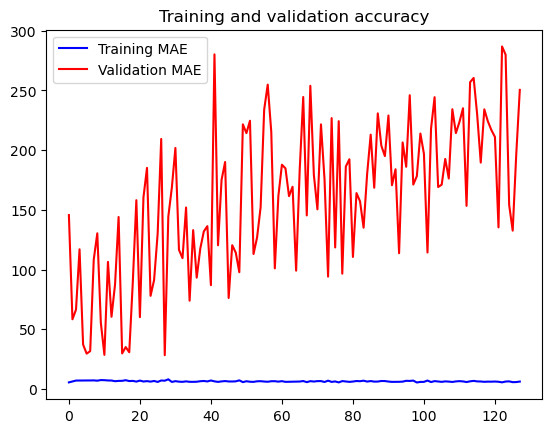

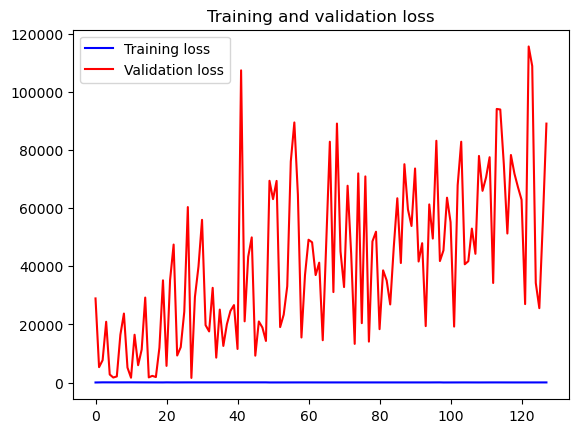

In [ ]:
# Extract the history from the best model
accuracy = best_model_history.history['mean_absolute_error']
val_accuracy = best_model_history.history['val_mean_absolute_error']

loss = best_model_history.history['loss']
val_loss = best_model_history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training MAE')
plt.plot(epochs, val_accuracy, 'r', label='Validation MAE')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()


Now we will define a function called plot_series() that visualizes time series data. It takes the x-axis values, y-axis values, and various optional parameters such as line style, start and end time steps, title, x-axis label, y-axis label, and legend. The function plots the series data with the specified parameters.

In [ ]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      label (string) - tag for the line
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

**Visualize Predictions**

The model_forecast function generates predictions on data windows using a given model. It takes the model, a time series array, window size, and batch size as inputs. The function creates a TensorFlow Dataset from the series, windows the data, and creates batches. It then predicts the target variable using the model and returns the predictions.

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

In the subsequent code, the model_forecast function is used to generate predictions (forecast) for a reduced series (forecast_series) based on the best_model, window size, and batch size. The single-dimensional axis is dropped from the predictions to obtain results. Finally, the plot_series function is called to visualize the original test set (X_test and y_test) along with the forecasted results (results).

19/19 [==============================] - 0s 5ms/step


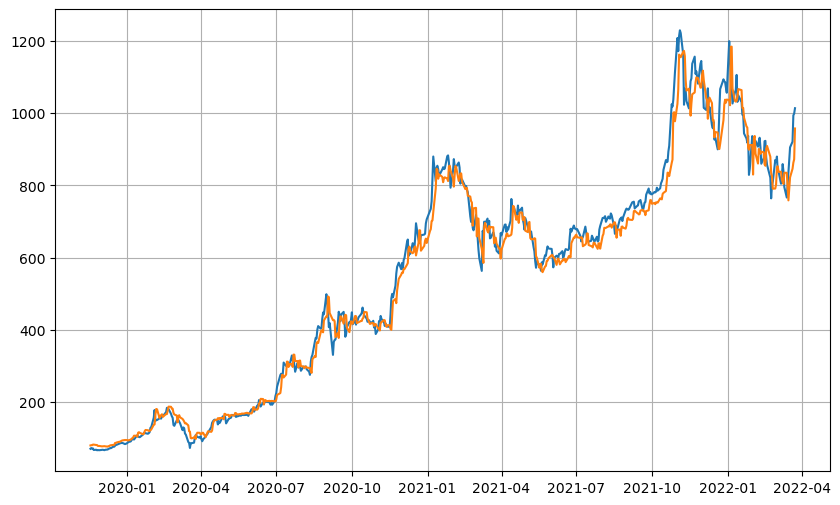

In [ ]:
# Reduce the original series
forecast_series = stock_price[split_size-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(best_model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(X_test, (y_test, results))